In [ ]:
star = 1
galaxy = 2 
quasar = 3

star = 20%
galaxy = 20% 
quasar = 60% 

In [12]:
.5 

star = 1 
galaxy = quasar = 0 

In [ ]:
import os 
import sys 

# Append the path so we can import the correct library 
sys.path.append(os.path.abspath("Desktop/machine learning/Classification with NN/csv_data.py"))
from csv_data import SkyServerBinaryDatasetWrapper 

#load in our data. the wrapper handles the details of loading and processing the data for us. 
wrapper = SkyServerBinaryDatasetWrapper()
[train_x, train_y], [valid_x, valid_y], [test_x, test_y] = wrapper.get_flat_datasets()

In [16]:
train_x[:5]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.21085172, -0.21763043,
        -0.36973112,  1.03148936,  1.30931064],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.21085172, -0.21763043,
        -0.36984929, -0.63621258, -0.87919741],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.21085172, -0.21147922,
        -0.05302706, -0.65633905, -0.60919097],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.21085172, -0.20532801,
        -0.36999261,  1.03148936,  1.30931064],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089,  0.21085172, -0.20532801,
        -0.36818949,  1.03148936,  1.30931064]])

In [17]:
train_y[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]])

$\sigma=\frac{1}{1 + e^{-x}}$

In [20]:
#SIGMOID ACTIVATION

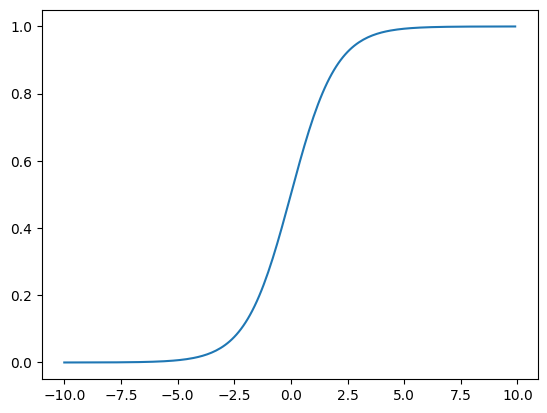

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 

nn_outputs = np.arange(-10, 10, .1)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

plt.plot(nn_outputs, sigmoid(nn_outputs))

In [25]:
1/(1 + np.e ** -(-100))

3.7200759760208555e-44

In [26]:
#BINARY NLL

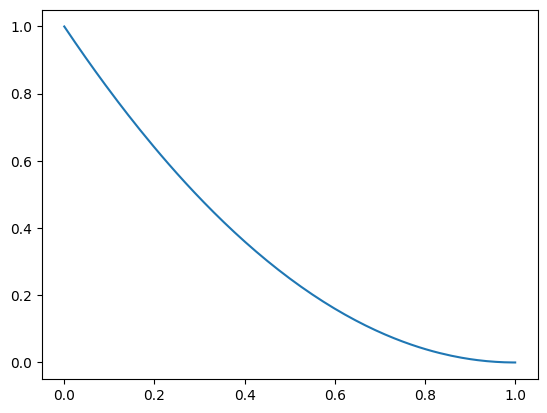

In [29]:
mse = lambda pred, actual: (actual - pred) ** 2
output_probs = sigmoid(nn_outputs)

plt.plot(output_probs, mse(output_probs, 1))

$NLL = -(y * log(\hat{y}) + (1-y) * log(1-\hat{y}))$

$$NLL = -(1 * log(.7) + (1-1) * (1-.7))$$
$$NLL = -(1 * log(.7) + 0 * (1-.7))$$
$$NLL = -(1 * log(.7))$$
$$NLL = -(1 * log(.7))$$
$$NLL = .3566$$

In [33]:
-np.log(.7)

0.35667494393873245

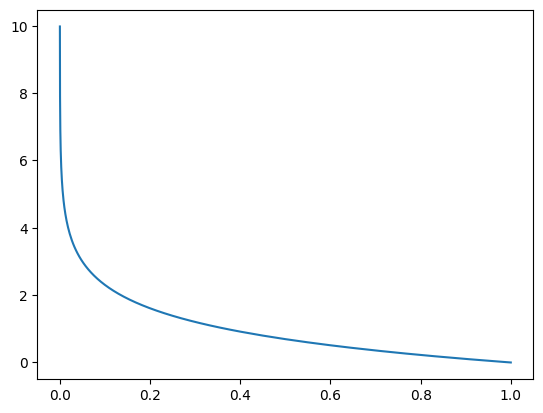

In [48]:
tol = 1e-6
nll = lambda pred, actual: -(actual * np.log(pred + tol) + (1-actual) * np.log(1-pred + tol))

plt.plot(output_probs, nll(output_probs, 1))

In [37]:
#BINARY CLASSIFICATION

In [52]:
sys.path.append(os.path.abspath("Desktop/machine learning/Classification with NN/dense.py"))

from dense import Dense

class ClassificationNet():
    def __init__(self, output_size=1):
        self.layer1 = Dense(input_size=13, output_size=25)
        self.layer2 = Dense(input_size=25, output_size=output_size, activation=False)

    def forward(self, x):
        x = self.layer1.forward(x) 
        x = self.layer2.forward(x)
        return x 

    def backward(self, grad, lr):
        grad = self.layer2.backward(grad, lr)
        self.layer1.backward(grad, lr)

$\frac{\partial L}{\partial p}=\frac{p-y}{p(1-p)}$

$\frac{\partial p}{\partial z}=p(1-p)$

$$\frac{\partial L}{\partial z} = \frac{\partial L}{\partial p} * \frac{\partial p}{\partial z}$$
$$\frac{\partial L}{\partial z} = \frac{p-y}{p(1-p)} * \frac{\partial p}{\partial z}=p(1-p)$$
$$\frac{\partial L}{\partial z} = p - y$$

In [58]:
from sympy import diff, symbols, ln, simplify, exp, expand

actual, pred = symbols('y, p')

sympy_nll = -(actual * ln(pred) + (1-actual) * ln(1-pred))

simplify(diff(sympy_nll, pred))

(-p + y)/(p*(p - 1))

$\frac{p-y}{p(1-p)}$

In [60]:
x = symbols('x')

sympy_sigmoid = 1/(1+exp(-x))

diff(sympy_sigmoid, x)

exp(-x)/(1 + exp(-x))**2

$\sigma(1-\sigma)$,

In [61]:
nll_grad = lambda pred, actual: pred - actual

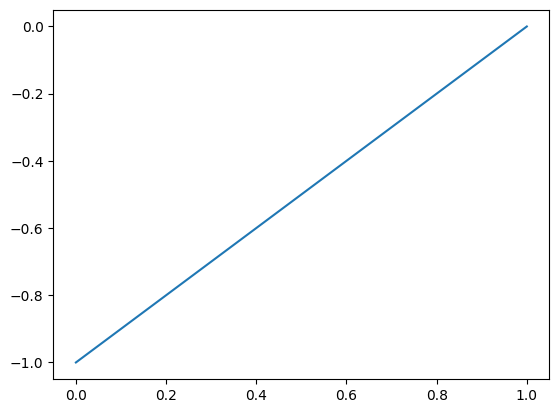

In [62]:
plt.plot(output_probs, nll_grad(output_probs, 1))

In [64]:
net = ClassificationNet(1)
lr = 1e-2
epochs = 50

for epoch in range(epochs):
    epoch_loss = 0 
    for x, target in zip(train_x, train_y):
        pred = sigmoid(net.forward(x.reshape(1, -1)))
        grad = nll_grad(pred, target)
        epoch_loss += nll(pred, target)[0,0]

        net.backward(grad, lr)

    if epoch % 10 == 0:
        print(f"Epoch {epoch} train loss: {epoch_loss / len(train_x)}")
        epoch_loss = 0
        for x, target in zip(valid_x, valid_y):
            pred = sigmoid(net.forward(x.reshape(1,-1)))
            epoch_loss += nll(pred, target)[0,0]
        print(f"Valid loss: {epoch_loss / len(valid_x)}")

Epoch 0 train loss: 0.26826958277903484
Valid loss: 0.2644771902817306
Epoch 10 train loss: 0.10104581465738756
Valid loss: 0.12039744183988184
Epoch 20 train loss: 0.07648901768969218
Valid loss: 0.09312973342784744
Epoch 30 train loss: 0.0680452879896135
Valid loss: 0.09299463791060257
Epoch 40 train loss: 0.06247892193181195
Valid loss: 0.09788190123806988


In [65]:
#MULTICLASS ENCODING

In [66]:
def encode(target, max_value=3):
    encoded = np.zeros((1, max_value))
    encoded[0,target] = 1
    return encoded

In [ ]:
0 = star
1 = galaxy 
2 = quasar 

In [68]:
encode(0)

array([[1., 0., 0.]])

In [69]:
encode(1)

array([[0., 1., 0.]])

In [70]:
encode(2)

array([[0., 0., 1.]])

In [71]:
#SOFTMAX FUNCTION

$\zeta=\frac{e^{\hat{y_{i}}}}{\sum_{j=0}e^{\hat{y_{j}}}}$

In [72]:
[.1,.1,5]

[0.1, 0.1, 5]

In [73]:
def softmax(preds):
    preds = np.exp(preds)
    if len(preds.shape) > 1:
        normed = preds / np.sum(preds, axis = 1).reshape(-1,1)
    else:
        normed = preds / np.sum(preds)
    return normed

In [74]:
softmax(np.array([10,20,30]))

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In [75]:
max([10,20,30])

30

In [77]:
[.01, .01, .98]

[0.01, 0.01, 0.98]

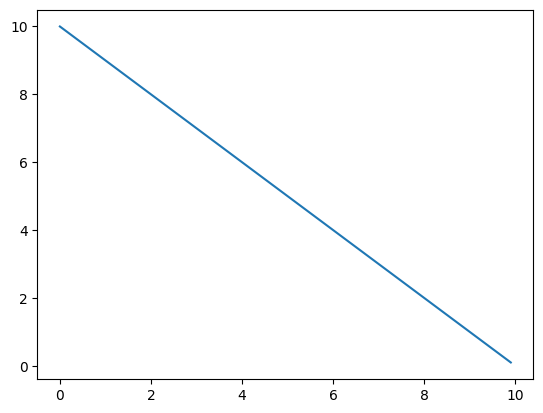

In [78]:
x = np.arange(0,10,.1).reshape(-1,1)
y = np.arange(10,0,-.1).reshape(-1,1)

plt.plot(x,y)

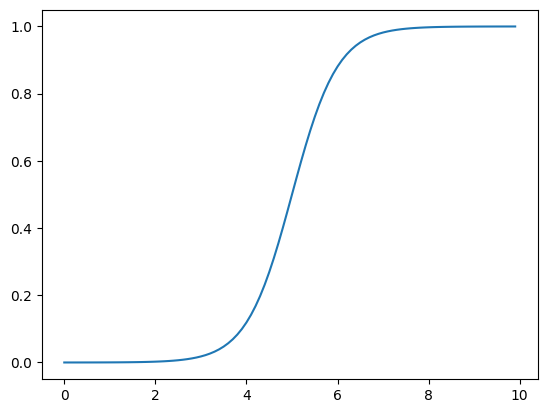

In [80]:
softmaxed = softmax(np.hstack((x,y)))

plt.plot(x, softmaxed[:,0])

In [81]:
np.hstack((x,y))

array([[ 0. , 10. ],
       [ 0.1,  9.9],
       [ 0.2,  9.8],
       [ 0.3,  9.7],
       [ 0.4,  9.6],
       [ 0.5,  9.5],
       [ 0.6,  9.4],
       [ 0.7,  9.3],
       [ 0.8,  9.2],
       [ 0.9,  9.1],
       [ 1. ,  9. ],
       [ 1.1,  8.9],
       [ 1.2,  8.8],
       [ 1.3,  8.7],
       [ 1.4,  8.6],
       [ 1.5,  8.5],
       [ 1.6,  8.4],
       [ 1.7,  8.3],
       [ 1.8,  8.2],
       [ 1.9,  8.1],
       [ 2. ,  8. ],
       [ 2.1,  7.9],
       [ 2.2,  7.8],
       [ 2.3,  7.7],
       [ 2.4,  7.6],
       [ 2.5,  7.5],
       [ 2.6,  7.4],
       [ 2.7,  7.3],
       [ 2.8,  7.2],
       [ 2.9,  7.1],
       [ 3. ,  7. ],
       [ 3.1,  6.9],
       [ 3.2,  6.8],
       [ 3.3,  6.7],
       [ 3.4,  6.6],
       [ 3.5,  6.5],
       [ 3.6,  6.4],
       [ 3.7,  6.3],
       [ 3.8,  6.2],
       [ 3.9,  6.1],
       [ 4. ,  6. ],
       [ 4.1,  5.9],
       [ 4.2,  5.8],
       [ 4.3,  5.7],
       [ 4.4,  5.6],
       [ 4.5,  5.5],
       [ 4.6,  5.4],
       [ 4.7,

In [ ]:
#MULTICLASS NLL 

In [82]:
[.01, .01, .98]

[0.01, 0.01, 0.98]

$$NLL = - \sum_{i=0} y_{i} \log p_{i}$$

$NLL = -(y * log(\hat{y}) + (1-y) * log(1-\hat{y}))$

In [84]:
target = [0,1,0]
pred = [.01, .9, .09]

In [85]:
-(1 * np.log(.9))

0.10536051565782628

In [86]:
def multiclass_loss(predicted, actual):
    tol = 1e-6
    cross_entropy = actual * np.log(predicted + tol)
    return -np.sum(cross_entropy) 

In [87]:
multiclass_loss(np.array([.8,.1,.1]), np.array([1,0,0]))

0.2231423013149909

In [88]:
multiclass_loss(np.array([.1,.8,.1]), np.array([1,0,0]))

2.3025750930440454

In [89]:
multiclass_loss_grad = lambda pred, actual: pred - actual 

In [90]:
#MULTICLASS CLASSIFICATION

In [92]:
net = ClassificationNet(3)
lr = 1e-3
epochs = 50

for epoch in range(epochs):
    epoch_loss = 0 
    for x, target in zip(train_x, train_y):
        pred = softmax(net.forward(x.reshape(1, -1)))

        encoded = encode(target)
        grad = multiclass_loss_grad(pred, encoded)
        epoch_loss += multiclass_loss(pred, encoded)

        net.backward(grad, lr)

    if epoch % 10 == 0:
        print(f"Epoch {epoch} train loss: {epoch_loss / len(train_x)}")
        epoch_loss = 0
        for x, target in zip(valid_x, valid_y):
            pred = softmax(net.forward(x.reshape(1,-1)))
            encoded = encode(target)
            epoch_loss += multiclass_loss(pred, encoded)
        print(f"Valid loss: {epoch_loss / len(valid_x)}")

Epoch 0 train loss: 0.45251733403624556
Valid loss: 0.30384978931772844
Epoch 10 train loss: 0.20493730457841225
Valid loss: 0.23215598386580844
Epoch 20 train loss: 0.1646559519476404
Valid loss: 0.1957477666502035
Epoch 30 train loss: 0.13581549486473626
Valid loss: 0.16032609837084888
Epoch 40 train loss: 0.11723969420261432
Valid loss: 0.1413289459407357
